# FLIPR HACKATHON 6.0 MACHINE LEARNING TASK

### COVID-19 CASES PREDICTION AMONG VARIOUS CITIES

#### PROBLEM STATEMENT 1:-
The objective of the first part of the problem statement is to predict the Covid Cases of a City on 1st September 2020. The output file 01 should contain only City and the respective Covid Cases for the test data.

#### PROBLEM STATEMENT 2:-
The Foreign Visitors of a city is a time-dependent parameter, for which you have to come up with a Time-series prediction model. Using the Foreign Visitors predicted by the model, you need to calculate the Covid Cases on 1st Oct 2020 for every City in the test data. The output file 02 should contain only City and the respective Covid Cases on 1st October.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_excel('Train_dataset.xlsx')
test = pd.read_excel('Test_dataset.xlsx')

#### Combining the train and test dataset

In [3]:
dataset = train.append(test,ignore_index=True)
dataset.head(10)

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,Maharashtra,M.C,12442373.0,11978450.0,878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115.0
1,Delhi,Delhi,M.C,11007835.0,9879172.0,858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188.0
2,Bangalore,Karnataka,MPUA,8436675.0,4301326.0,936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000.0
3,Hyderabad,Telangana,MPUA,6809970.0,3637483.0,930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123.0
4,Ahmedabad,Gujarat,MPUA,5570585.0,3520085.0,852.0,29.0,25.0,LOW,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204.0
5,Chennai,Tamil Nadu,MPUA,4681087.0,4343645.0,904.0,26.0,31.0,HIGH,210.0,179.0,0.536995,4231703.0,67.0,4684707.0,145606.0
6,Chennai,Tamil nadu,T,4646732.0,NaN,912.0,26.0,30.0,MEDIUM,145.0,177.0,0.093451,4237820.0,55.0,4684707.0,145606.0
7,Kolkata,West Bengal,MPUA,4486679.0,4572876.0,945.0,26.0,37.0,NaN,NaN,NaN,0.473585,4239912.0,82.0,1489500.0,44957.0
8,Surat,Gujarat,MPUA,4467797.0,2433835.0,NaN,27.0,26.0,NaN,NaN,NaN,0.809334,3797627.0,98.0,284973.0,23432.0
9,Pune,Maharashtra,MPUA,3124458.0,2538473.0,NaN,29.0,29.0,NaN,NaN,NaN,0.445902,2743274.0,50.0,4408916.0,218502.0


In [4]:
dataset.tail(10)

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
1278,Bhaiseena,Rajasthan,G.P,3200.0,NaN,869.0,24.0,34.0,LOW,17.0,167.0,0.092957,2781.0,4.0,1475311.0,NaN
1279,Dwarahat,Uttarakhand,N.P,2749.0,NaN,836.0,25.0,12.0,HIGH,18.0,146.0,0.186739,2298.0,8.0,105882.0,NaN
1280,Badrinath,Uttarakhand,N.P,2438.0,NaN,848.0,29.0,12.0,LOW,19.0,190.0,0.432991,2067.0,4.0,105882.0,NaN
1281,Dogadda,Uttarakhand,N.P.P,2422.0,NaN,840.0,26.0,11.0,HIGH,11.0,146.0,0.030421,2034.0,4.0,105882.0,NaN
1282,Devprayag,Uttarakhand,N.P,2152.0,NaN,840.0,29.0,7.0,MEDIUM,14.0,124.0,0.503070,1808.0,8.0,105882.0,NaN
1283,Nandaprayag,Uttarakhand,N.P,1641.0,NaN,848.0,27.0,7.0,MEDIUM,12.0,181.0,0.316926,1392.0,4.0,105882.0,NaN
1284,Kirtinagar,Uttarakhand,N.P,1517.0,NaN,852.0,28.0,12.0,HIGH,16.0,198.0,0.336852,1292.0,6.0,105882.0,NaN
1285,Kedarnath,Uttarakhand,N.P,612.0,NaN,853.0,24.0,9.0,LOW,19.0,189.0,0.723253,522.0,6.0,105882.0,NaN
1286,Gangotri,Uttarakhand,N.P,110.0,NaN,852.0,27.0,8.0,MEDIUM,18.0,170.0,0.421061,94.0,8.0,105882.0,NaN
1287,Kumarganj,Uttar Pradesh,C.T,NaN,NaN,863.0,24.0,35.0,HIGH,19.0,149.0,0.154375,0.0,6.0,3104060.0,NaN


In [5]:
dataset.shape

(1288, 16)

NUMBER OF ROWS = 1288 &
NUMBER OF COLUMNS = 16

In [6]:
dataset.columns

Index(['City', 'State', 'Type', 'Population [2011]', 'Popuation [2001]',
       'Sex Ratio', 'Median Age', 'Avg Temp', 'SWM', 'Toilets Avl',
       'Water Purity', 'H Index', 'Female Population', '# of hospitals',
       'Foreign Visitors', 'Covid Cases'],
      dtype='object')

In [7]:
dataset.dtypes

City                  object
State                 object
Type                  object
Population [2011]    float64
Popuation [2001]     float64
Sex Ratio            float64
Median Age           float64
Avg Temp             float64
SWM                   object
Toilets Avl          float64
Water Purity         float64
H Index              float64
Female Population    float64
# of hospitals       float64
Foreign Visitors     float64
Covid Cases          float64
dtype: object

In [8]:
dataset.describe()

,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
count,1.234000e+03,2.950000e+02,1273.000000,1257.000000,1257.000000,1240.000000,1111.000000,1133.000000,1.132000e+03,1256.000000,1.181000e+03,787.00000
mean,1.957451e+05,5.320451e+05,901.736842,26.159109,30.228321,86.889516,150.801080,0.498773,1.757442e+05,33.111465,1.547432e+06,6615.64676
std,7.007524e+05,1.067831e+06,37.901777,2.125104,7.998182,29.550628,28.905921,0.289424,6.447710e+05,25.669372,1.683666e+06,15108.10276
min,1.100000e+02,2.935400e+04,774.000000,23.000000,5.000000,10.000000,100.000000,0.000957,0.000000e+00,3.000000,7.980000e+02,334.00000
25%,2.777575e+04,1.694320e+05,873.000000,24.000000,27.000000,66.000000,126.000000,0.251916,2.414575e+04,16.000000,2.378540e+05,2270.00000
50%,4.739200e+04,2.366000e+05,902.000000,26.000000,31.000000,85.000000,151.000000,0.507363,3.884550e+04,23.000000,6.365020e+05,2582.00000
75%,9.998275e+04,4.745850e+05,926.000000,28.000000,36.000000,100.000000,176.000000,0.748042,9.915425e+04,30.000000,3.104060e+06,8761.00000
max,1.244237e+07,1.197845e+07,1042.000000,32.000000,40.000000,227.000000,200.000000,0.999901,1.092440e+07,159.000000,4.684707e+06,218502.00000


## Imputation

In [9]:
dataset.isnull().sum()

City                   0
State                  0
Type                   2
Population [2011]     54
Popuation [2001]     993
Sex Ratio             15
Median Age            31
Avg Temp              31
SWM                   13
Toilets Avl           48
Water Purity         177
H Index              155
Female Population    156
# of hospitals        32
Foreign Visitors     107
Covid Cases          501
dtype: int64

In [10]:
threshold = 0.4

In [11]:
null_list_per = []
for i in dataset.columns:
    x = ((dataset[i].isnull().sum())/dataset.shape[0])
    null_list_per.append(x)
print(null_list_per)

[0.0, 0.0, 0.0015527950310559005, 0.04192546583850932, 0.7709627329192547, 0.011645962732919254, 0.02406832298136646, 0.02406832298136646, 0.010093167701863354, 0.037267080745341616, 0.1374223602484472, 0.1203416149068323, 0.12111801242236025, 0.024844720496894408, 0.08307453416149069, 0.3889751552795031]


#### The column "Population [2001]" is having null values more than our taken threshold and is not of much use

Deleting the "Population [2001]" column

In [12]:
del dataset['Popuation [2001]']

#### The columns "Population[2011]", "Sex Ratio", "Median Age", "Avg Temp", "Toilets Avl", "Water Purity", "H Index", "Female Population", "# of hospitals", "Foreign Visitors" are having null values less than our threshold

Replacing the NULL values with the medians of their respective columns

In [13]:
list1 = ['Population [2011]','Sex Ratio','Median Age','Avg Temp','Toilets Avl','Water Purity','H Index','Female Population','# of hospitals','Foreign Visitors']
for i in list1:
    dataset[i].fillna(dataset[i].median(), inplace=True)

#### The column "SWM" and "Type" is a categorical column and is having null values less than the threshold

Replacing the NULL values with the mode of the column

In [14]:
dataset['SWM'].fillna(dataset['SWM'].value_counts().idxmax(), inplace=True)
dataset['Type'].fillna(dataset['Type'].value_counts().idxmax(), inplace=True)

In [15]:
dataset.isnull().sum()

City                   0
State                  0
Type                   0
Population [2011]      0
Sex Ratio              0
Median Age             0
Avg Temp               0
SWM                    0
Toilets Avl            0
Water Purity           0
H Index                0
Female Population      0
# of hospitals         0
Foreign Visitors       0
Covid Cases          501
dtype: int64

In [16]:
dataset.shape

(1288, 15)

In [17]:
dataset.head(10)

,City,State,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,Maharashtra,M.C,12442373.0,878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115.0
1,Delhi,Delhi,M.C,11007835.0,858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188.0
2,Bangalore,Karnataka,MPUA,8436675.0,936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000.0
3,Hyderabad,Telangana,MPUA,6809970.0,930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123.0
4,Ahmedabad,Gujarat,MPUA,5570585.0,852.0,29.0,25.0,LOW,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204.0
5,Chennai,Tamil Nadu,MPUA,4681087.0,904.0,26.0,31.0,HIGH,210.0,179.0,0.536995,4231703.0,67.0,4684707.0,145606.0
6,Chennai,Tamil nadu,T,4646732.0,912.0,26.0,30.0,MEDIUM,145.0,177.0,0.093451,4237820.0,55.0,4684707.0,145606.0
7,Kolkata,West Bengal,MPUA,4486679.0,945.0,26.0,37.0,LOW,85.0,151.0,0.473585,4239912.0,82.0,1489500.0,44957.0
8,Surat,Gujarat,MPUA,4467797.0,902.0,27.0,26.0,LOW,85.0,151.0,0.809334,3797627.0,98.0,284973.0,23432.0
9,Pune,Maharashtra,MPUA,3124458.0,902.0,29.0,29.0,LOW,85.0,151.0,0.445902,2743274.0,50.0,4408916.0,218502.0


## One-hot encoding

In [18]:
dataset['Type'].value_counts()

M                 357
C-1T              269
M.Cl              120
N.P                96
C.T                50
T.P                47
MPUA               44
M.B                44
UA                 36
T.M.C              35
N.P.P              32
N.A                21
M.C                15
M.Cl.              14
C.T.                9
N.P.P.              9
N.A.C               9
T.M.C.              8
N.P.                8
T.C                 8
C.M.C               7
T.P.                5
NP                  4
G.P                 3
CMC                 3
M.B.                3
C.B                 3
N.T                 3
N.Pd                3
M.C.                2
MB                  2
NPP                 2
M.Corp              2
T                   2
U.A                 1
M Cl                1
CT                  1
NAC                 1
M&F                 1
Np                  1
TP                  1
N.A.C.              1
Nagar Parishad      1
M.Corp.             1
I.N.A               1
T.C.      

##### Function for merging same kind of city types such as 'C.T' and 'C.T.' are same

In [19]:
def join_same(x):
    if x == 'M.Cl' or x == 'M.Cl.' or x == 'M Cl':
        return 'M.Cl'
    elif x == 'T.M.C' or x == 'T.M.C.':
        return 'T.M.C'
    elif x == 'N.P' or x == 'NP' or x == 'N.P.' or x == 'Np' or x == 'Nagar Parishad':
        return 'N.P'
    elif x == 'N.P.P' or x == 'N.P.P.' or x == 'NPP':
        return 'N.P.P'
    elif x == 'C.T' or x == 'C.T.':
        return 'C.T'
    elif x == 'C.M.C' or x == 'CMC':
        return 'C.M.C'
    elif x == 'M.Corp' or x == 'M.Corp.':
        return 'M.Corp'
    elif x == 'C.T' or x == 'CT':
        return 'C.T'
    elif x == 'T.P' or x == 'T.P.' or x == 'TP':
        return 'T.P'
    elif x == 'UA' or x == 'U.A':
        return 'U.A'
    elif x == 'M.B' or x == 'M.B.' or x == 'MB':
        return 'M.B'
    elif x == 'M.C' or x == 'M.C.':
        return 'M.C'
    elif x == 'N.A.C' or x == 'NAC' or x == 'N.A.C.':
        return 'N.A.C'
    elif x == 'G.P' or x == 'G.P.':
        return 'G.P'
    elif x == 'T.C' or x == 'T.C.':
        return 'T.C'
    else:
        return x

In [20]:
dataset['Type'] = dataset['Type'].apply(join_same)

In [21]:
dataset['Type'].value_counts()

M         357
C-1T      269
M.Cl      135
N.P       110
C.T        60
T.P        53
M.B        49
MPUA       44
N.P.P      43
T.M.C      43
U.A        37
N.A        21
M.C        17
N.A.C      11
C.M.C      10
T.C         9
G.P         4
N.T         3
M.Corp      3
N.Pd        3
C.B         3
T           2
I.N.A       1
M&F         1
Name: Type, dtype: int64

In [22]:
dataset['Type'].unique()

array(['M.C', 'MPUA', 'T', 'M', 'C-1T', 'M.Cl', 'M.Corp', 'N.P', 'U.A',
       'M.B', 'N.Pd', 'N.P.P', 'C.M.C', 'C.T', 'N.A.C', 'T.C', 'T.M.C',
       'N.T', 'C.B', 'T.P', 'N.A', 'I.N.A', 'G.P', 'M&F'], dtype=object)

In [23]:
dataset['State'].unique()

array(['Maharashtra', 'Delhi', 'Karnataka', 'Telangana', 'Gujarat',
       'Tamil Nadu', 'Tamil nadu', 'West Bengal', 'Rajasthan',
       'Uttar Pradesh', 'Madhya Pradesh', 'Andhra Pradesh', 'Bihar',
       'Punjab', 'Jharkhand', 'Haryana', 'Jammu and Kashmir',
       'Chandigarh', 'Chhattisgarh', 'Assam', 'Odisha', 'Kerala',
       'Uttarakhand', 'Tripura', 'Puducherry', 'Mizoram', 'Manipur',
       'Himachal Pradesh', 'Sikkim', 'Andaman and Nicobar Islands', 'Goa',
       'Nagaland', 'Meghalaya', 'Arunachal Pradesh',
       'Dadra and Nagar Haveli', 'Andhra pradesh'], dtype=object)

##### Function for merging same kind of states such as 'Andhra Pradesh' and 'Andhra pradesh' are same

In [24]:
def join_same_state(x):
    if x == 'Andhra Pradesh' or x == 'Andhra pradesh':
        return 'Andhra Pradesh'
    elif x == 'Tamil Nadu' or x == 'Tamil nadu':
        return 'Tamil Nadu'
    else:
        return x

In [25]:
dataset['State'] = dataset['State'].apply(join_same_state)

In [26]:
dataset['State'].unique()

array(['Maharashtra', 'Delhi', 'Karnataka', 'Telangana', 'Gujarat',
       'Tamil Nadu', 'West Bengal', 'Rajasthan', 'Uttar Pradesh',
       'Madhya Pradesh', 'Andhra Pradesh', 'Bihar', 'Punjab', 'Jharkhand',
       'Haryana', 'Jammu and Kashmir', 'Chandigarh', 'Chhattisgarh',
       'Assam', 'Odisha', 'Kerala', 'Uttarakhand', 'Tripura',
       'Puducherry', 'Mizoram', 'Manipur', 'Himachal Pradesh', 'Sikkim',
       'Andaman and Nicobar Islands', 'Goa', 'Nagaland', 'Meghalaya',
       'Arunachal Pradesh', 'Dadra and Nagar Haveli'], dtype=object)

#### GROUPING THE STATES BASING ON CITY TYPES

In [27]:
dataset.groupby(['State','Type']).size()

State                        Type
Andaman and Nicobar Islands  M.Cl     1
Andhra Pradesh               C-1T    29
                             C.T     14
                             G.P      1
                             M       42
                                     ..
Uttarakhand                  U.A      1
West Bengal                  C-1T    27
                             C.T      7
                             M       21
                             MPUA     2
Length: 161, dtype: int64

<AxesSubplot:ylabel='State'>

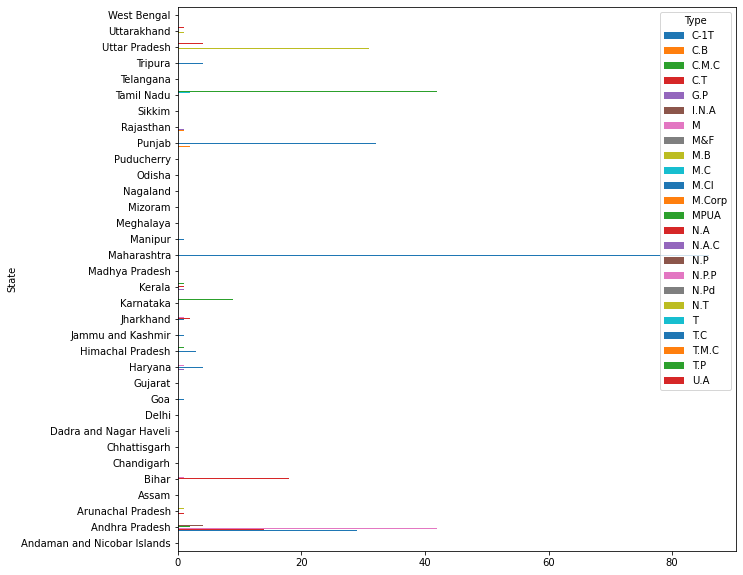

In [28]:
dataset.groupby(['State','Type']).size().unstack('Type').plot(kind='barh',figsize=(10,10))

##### Encoding the 'Type' column

In [29]:
encoded_columns = pd.get_dummies(dataset['Type'])
dataset = dataset.join(encoded_columns).drop('Type', axis=1)

In [30]:
dataset['SWM'].value_counts()

LOW       452
HIGH      430
MEDIUM    406
Name: SWM, dtype: int64

#### GROUPING THE STATES BASING ON SOLID WASTE MANAGEMENT

In [31]:
dataset.groupby(['State','SWM']).size()

State                        SWM   
Andaman and Nicobar Islands  HIGH       1
Andhra Pradesh               HIGH      38
                             LOW       32
                             MEDIUM    23
Arunachal Pradesh            HIGH       1
                                       ..
Uttarakhand                  LOW       19
                             MEDIUM    18
West Bengal                  HIGH      17
                             LOW       22
                             MEDIUM    18
Length: 88, dtype: int64

<AxesSubplot:ylabel='State'>

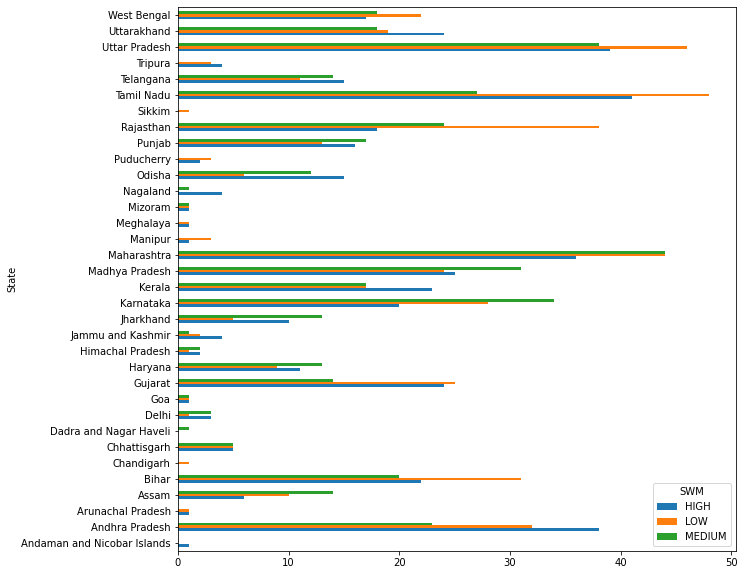

In [32]:
dataset.groupby(['State','SWM']).size().unstack('SWM').plot(kind='barh',figsize=(10,10))

<AxesSubplot:ylabel='SWM'>

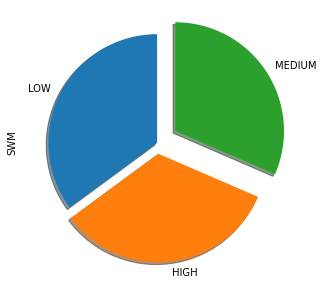

In [33]:
dataset['SWM'].value_counts(normalize=True).mul(100).round(1).plot(kind='pie',startangle=90,figsize=(10,5),explode=(0,0.1,0.2),shadow=True)

##### Encoding the 'SWM' column

In [34]:
encoded_columns = pd.get_dummies(dataset['SWM'])
dataset = dataset.join(encoded_columns).drop('SWM', axis=1)

In [35]:
dataset.head(15)

,City,State,Population [2011],Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,...,N.Pd,N.T,T,T.C,T.M.C,T.P,U.A,HIGH,LOW,MEDIUM
0,Mumbai,Maharashtra,12442373.0,878.0,23.0,32.0,219.0,150.0,0.700440,10924403.0,...,0,0,0,0,0,0,0,0,0,1
1,Delhi,Delhi,11007835.0,858.0,27.0,30.0,215.0,196.0,0.920018,9444722.0,...,0,0,0,0,0,0,0,0,0,1
2,Bangalore,Karnataka,8436675.0,936.0,28.0,37.0,212.0,102.0,0.097085,7896728.0,...,0,0,0,0,0,0,0,1,0,0
3,Hyderabad,Telangana,6809970.0,930.0,23.0,31.0,217.0,118.0,0.827744,6333272.0,...,0,0,0,0,0,0,0,0,0,1
4,Ahmedabad,Gujarat,5570585.0,852.0,29.0,25.0,227.0,109.0,0.847941,4746138.0,...,0,0,0,0,0,0,0,0,1,0
5,Chennai,Tamil Nadu,4681087.0,904.0,26.0,31.0,210.0,179.0,0.536995,4231703.0,...,0,0,0,0,0,0,0,1,0,0
6,Chennai,Tamil Nadu,4646732.0,912.0,26.0,30.0,145.0,177.0,0.093451,4237820.0,...,0,0,1,0,0,0,0,0,0,1
7,Kolkata,West Bengal,4486679.0,945.0,26.0,37.0,85.0,151.0,0.473585,4239912.0,...,0,0,0,0,0,0,0,0,1,0
8,Surat,Gujarat,4467797.0,902.0,27.0,26.0,85.0,151.0,0.809334,3797627.0,...,0,0,0,0,0,0,0,0,1,0
9,Pune,Maharashtra,3124458.0,902.0,29.0,29.0,85.0,151.0,0.445902,2743274.0,...,0,0,0,0,0,0,0,0,1,0


## Visual Representation

STATE VS POPULATION GRAPH

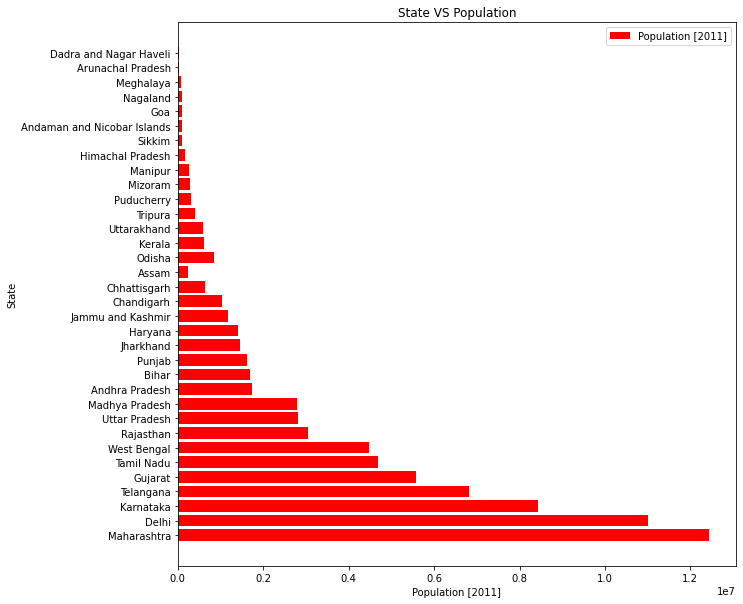

In [36]:
plt.rcParams['figure.figsize']=(10,10)
plt.barh(dataset['State'],dataset['Population [2011]'],label='Population [2011]',color='r')
plt.xlabel('Population [2011]')
plt.ylabel('State')
plt.title('State VS Population')
plt.legend()
plt.show()

STATE VS HEALTH INDEX GRAPH

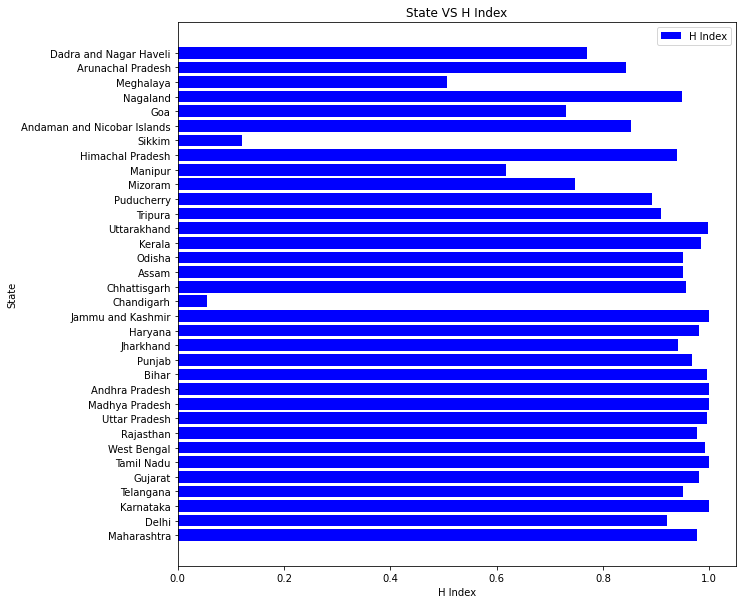

In [37]:
plt.rcParams['figure.figsize']=(10,10)
plt.barh(dataset['State'],dataset['H Index'],label='H Index',color='blue')
plt.xlabel('H Index')
plt.ylabel('State')
plt.title('State VS H Index')
plt.legend()
plt.show()

STATE VS NUMBER OF HOSPITALS GRAPH

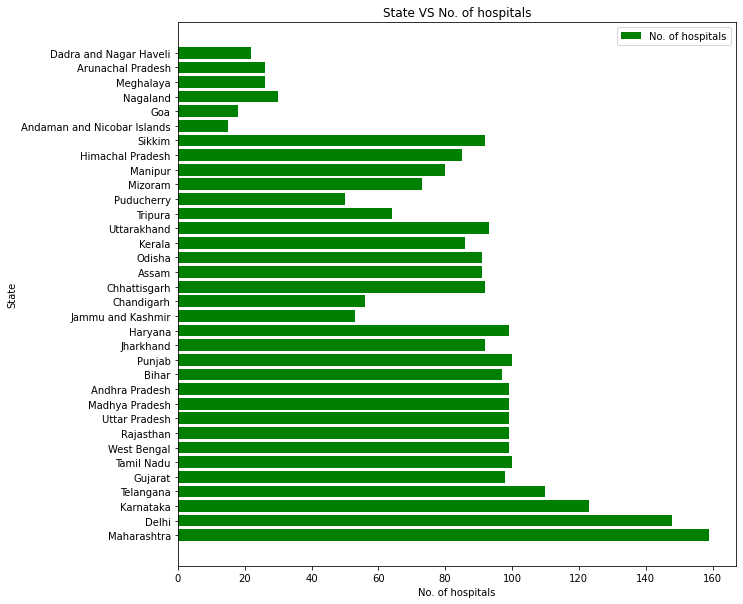

In [38]:
plt.rcParams['figure.figsize']=(10,10)
plt.barh(dataset['State'],dataset['# of hospitals'],label='No. of hospitals',color='green')
plt.xlabel('No. of hospitals')
plt.ylabel('State')
plt.title('State VS No. of hospitals')
plt.legend()
plt.show()

STATE VS WATER PURITY GRAPH

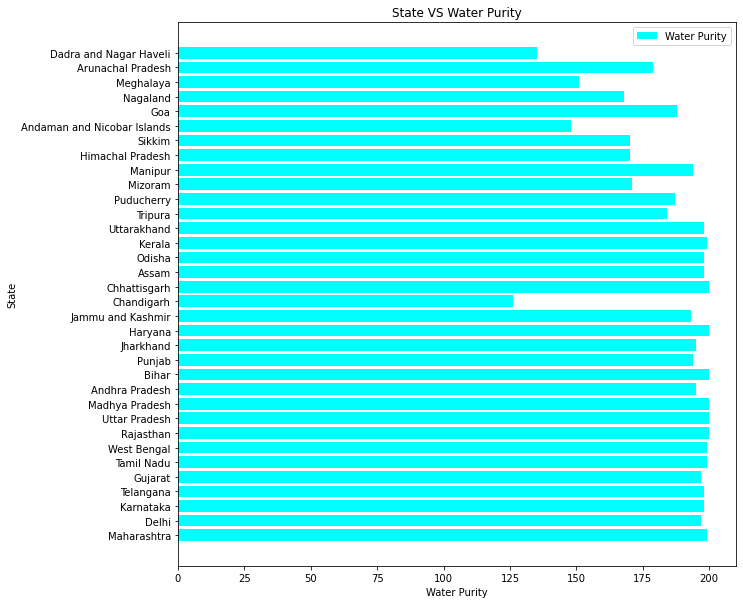

In [39]:
plt.rcParams['figure.figsize']=(10,10)
plt.barh(dataset['State'],dataset['Water Purity'],label='Water Purity',color='cyan')
plt.xlabel('Water Purity')
plt.ylabel('State')
plt.title('State VS Water Purity')
plt.legend()
plt.show()

STATE VS FOREIGN VISITORS GRAPH

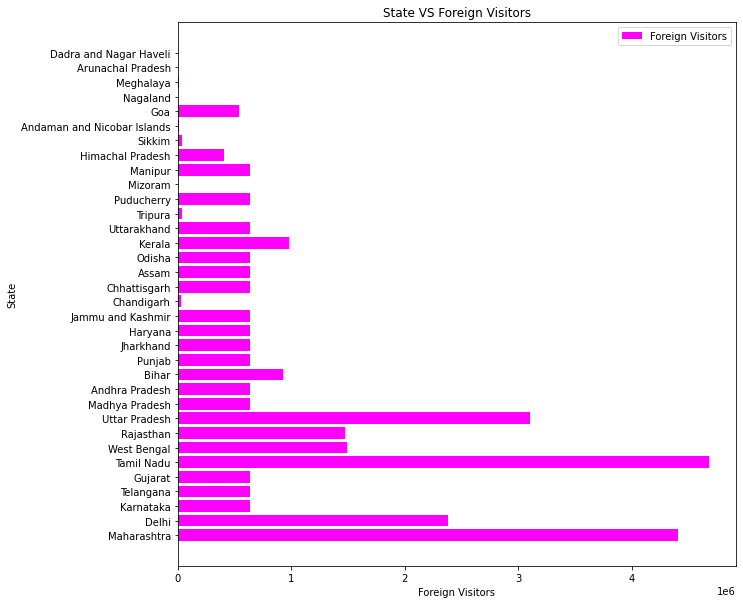

In [40]:
plt.rcParams['figure.figsize']=(10,10)
plt.barh(dataset['State'],dataset['Foreign Visitors'],label='Foreign Visitors',color='magenta')
plt.xlabel('Foreign Visitors')
plt.ylabel('State')
plt.title('State VS Foreign Visitors')
plt.legend()
plt.show()

## Scaling(Standardization)

In [41]:
list1

['Population [2011]',
 'Sex Ratio',
 'Median Age',
 'Avg Temp',
 'Toilets Avl',
 'Water Purity',
 'H Index',
 'Female Population',
 '# of hospitals',
 'Foreign Visitors']

In [42]:
for i in list1:
    dataset[i] = (dataset[i] - dataset[i].mean()) / dataset[i].std()

In [43]:
dataset.head(10)

,City,State,Population [2011],Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,...,N.Pd,N.T,T,T.C,T.M.C,T.P,U.A,HIGH,LOW,MEDIUM
0,Mumbai,Maharashtra,17.847286,-0.630036,-1.502875,0.221852,4.558506,-0.030859,0.739112,17.762036,...,0,0,0,0,0,0,0,0,0,1
1,Delhi,Delhi,15.757763,-1.160817,0.402344,-0.031244,4.420558,1.682693,1.548018,15.320646,...,0,0,0,0,0,0,0,0,0,1
2,Bangalore,Karnataka,12.012656,0.909232,0.878649,0.854590,4.317098,-1.818914,-1.483588,12.766544,...,0,0,0,0,0,0,0,1,0,0
3,Hyderabad,Telangana,9.643225,0.749997,-1.502875,0.095304,4.489532,-1.222896,1.208090,10.186930,...,0,0,0,0,0,0,0,0,0,1
4,Ahmedabad,Gujarat,7.837959,-1.320052,1.354954,-0.663983,4.834401,-1.558156,1.282494,7.568249,...,0,0,0,0,0,0,0,0,1,0
5,Chennai,Tamil Nadu,6.542331,0.059981,-0.073960,0.095304,4.248124,1.049424,0.136997,6.719460,...,0,0,0,0,0,0,0,1,0,0
6,Chennai,Tamil Nadu,6.492290,0.272294,-0.073960,-0.031244,2.006477,0.974921,-1.496977,6.729553,...,0,0,1,0,0,0,0,0,0,1
7,Kolkata,West Bengal,6.259160,1.148084,-0.073960,0.854590,-0.062735,0.006392,-0.096600,6.733004,...,0,0,0,0,0,0,0,0,1,0
8,Surat,Gujarat,6.231657,0.006903,0.402344,-0.537435,-0.062735,0.006392,1.140267,6.003259,...,0,0,0,0,0,0,0,0,1,0
9,Pune,Maharashtra,4.274972,0.006903,1.354954,-0.157792,-0.062735,0.006392,-0.198579,4.263636,...,0,0,0,0,0,0,0,0,1,0


#### Splitting back to train and test data

In [44]:
train_data = dataset[dataset['Covid Cases'].notnull()]

In [45]:
train_data.head(10)

,City,State,Population [2011],Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,...,N.Pd,N.T,T,T.C,T.M.C,T.P,U.A,HIGH,LOW,MEDIUM
0,Mumbai,Maharashtra,17.847286,-0.630036,-1.502875,0.221852,4.558506,-0.030859,0.739112,17.762036,...,0,0,0,0,0,0,0,0,0,1
1,Delhi,Delhi,15.757763,-1.160817,0.402344,-0.031244,4.420558,1.682693,1.548018,15.320646,...,0,0,0,0,0,0,0,0,0,1
2,Bangalore,Karnataka,12.012656,0.909232,0.878649,0.854590,4.317098,-1.818914,-1.483588,12.766544,...,0,0,0,0,0,0,0,1,0,0
3,Hyderabad,Telangana,9.643225,0.749997,-1.502875,0.095304,4.489532,-1.222896,1.208090,10.186930,...,0,0,0,0,0,0,0,0,0,1
4,Ahmedabad,Gujarat,7.837959,-1.320052,1.354954,-0.663983,4.834401,-1.558156,1.282494,7.568249,...,0,0,0,0,0,0,0,0,1,0
5,Chennai,Tamil Nadu,6.542331,0.059981,-0.073960,0.095304,4.248124,1.049424,0.136997,6.719460,...,0,0,0,0,0,0,0,1,0,0
6,Chennai,Tamil Nadu,6.492290,0.272294,-0.073960,-0.031244,2.006477,0.974921,-1.496977,6.729553,...,0,0,1,0,0,0,0,0,0,1
7,Kolkata,West Bengal,6.259160,1.148084,-0.073960,0.854590,-0.062735,0.006392,-0.096600,6.733004,...,0,0,0,0,0,0,0,0,1,0
8,Surat,Gujarat,6.231657,0.006903,0.402344,-0.537435,-0.062735,0.006392,1.140267,6.003259,...,0,0,0,0,0,0,0,0,1,0
9,Pune,Maharashtra,4.274972,0.006903,1.354954,-0.157792,-0.062735,0.006392,-0.198579,4.263636,...,0,0,0,0,0,0,0,0,1,0


In [46]:
train_data.shape

(787, 40)

In [47]:
test_data = dataset[dataset['Covid Cases'].isnull()]

In [48]:
test_data.head(10)

,City,State,Population [2011],Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,...,N.Pd,N.T,T,T.C,T.M.C,T.P,U.A,HIGH,LOW,MEDIUM
787,Tuensang,Nagaland,-0.222495,0.776536,-1.502875,-2.562199,0.247647,-1.371900,-0.907776,-0.206121,...,0,0,0,1,0,0,0,0,0,1
788,Lakshmeshwar,Karnataka,-0.222524,0.856154,-0.550265,0.981138,-0.855933,0.341652,-1.131887,-0.205971,...,0,0,0,0,1,0,0,1,0,0
789,Zira,Punjab,-0.222556,-0.497340,1.354954,0.601495,-0.821446,-1.707161,1.429630,-0.209096,...,0,0,0,0,0,0,0,1,0,0
790,Yawal,Maharashtra,-0.222594,-0.391184,-0.073960,0.095304,-0.924907,0.863168,-0.338804,-0.208892,...,0,0,0,0,0,0,0,1,0,0
791,Thana Bhawan,Uttar Pradesh,-0.222648,-0.656575,0.878649,1.107686,0.178673,0.080894,-0.645976,-0.209550,...,0,0,0,0,0,0,0,0,1,0
792,Ramdurg,Karnataka,-0.222677,1.068466,0.402344,-0.284339,0.178673,1.272930,0.265523,-0.205649,...,0,0,0,0,0,0,1,0,0,1
793,Pulgaon,Maharashtra,-0.222862,-0.391184,-0.073960,0.095304,-0.511064,-1.595407,-0.842183,-0.209161,...,0,0,0,0,0,0,0,0,0,1
794,Sadasivpet,Telangana,-0.223136,0.511145,0.402344,1.234234,-0.580038,-1.297398,-0.020554,-0.207397,...,0,0,0,0,0,0,0,0,1,0
795,Nargund,Karnataka,-0.223198,1.015388,-1.502875,0.854590,-0.338630,-0.105362,0.769036,-0.206324,...,0,0,0,0,1,0,0,0,1,0
796,Neem-Ka-Thana,Rajasthan,-0.223286,-1.373130,-0.550265,-0.663983,-0.890420,-0.105362,0.340829,-0.211799,...,0,0,0,0,0,0,0,0,0,1


In [49]:
test_data.shape

(501, 40)

#### Train-test split inside train data for creating validation dataset

In [50]:
X = train_data[['Population [2011]','Median Age','Avg Temp','Toilets Avl','Water Purity','H Index','# of hospitals','Foreign Visitors','M.C', 'MPUA', 'T', 'M', 'C-1T', 'M.Cl', 'M.Corp', 'N.P', 'U.A',
               'M.B', 'N.Pd', 'N.P.P', 'C.M.C', 'C.T', 'N.A.C', 'T.C', 'T.M.C',
               'N.T', 'C.B', 'T.P', 'N.A', 'I.N.A', 'G.P', 'M&F','HIGH','LOW','MEDIUM']]
Y = train_data['Covid Cases']

In [51]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.8, test_size=0.2, random_state=42)

## Applying K-Nearest Neighbor Regression

In [53]:
from sklearn.neighbors import KNeighborsRegressor

In [54]:
kr = KNeighborsRegressor()

In [55]:
kr.fit(X_train,Y_train)

KNeighborsRegressor()

In [56]:
Y_prediction = kr.predict(X_test)

In [57]:
predicted_df = pd.DataFrame({'Actual':Y_test, 'Predicted':Y_prediction})
predicted_df.head(10)

,Actual,Predicted
536,1974.0,2165.0
39,14726.0,13175.0
211,1845.0,6282.0
199,9361.0,7588.4
235,9191.0,8259.8
215,9923.0,8272.0
548,2822.0,2648.6
350,2247.0,2275.4
300,9151.0,7546.0
137,3734.0,9691.8


In [58]:
print('R-2 score: ',metrics.r2_score(Y_test,Y_prediction))

R-2 score:  0.769706861043576


## Applying Decision Tree Regression

In [59]:
from sklearn.tree import DecisionTreeRegressor

In [60]:
dr = DecisionTreeRegressor()

In [61]:
dr.fit(X_train,Y_train)

DecisionTreeRegressor()

In [62]:
Y_prediction = dr.predict(X_test)

In [63]:
predicted_df = pd.DataFrame({'Actual':Y_test, 'Predicted':Y_prediction})
predicted_df.head(10)

,Actual,Predicted
536,1974.0,2123.0
39,14726.0,23610.0
211,1845.0,571.0
199,9361.0,9571.0
235,9191.0,9221.0
215,9923.0,8997.0
548,2822.0,2828.0
350,2247.0,2265.0
300,9151.0,9521.0
137,3734.0,9141.0


In [64]:
print('R-2 score: ',metrics.r2_score(Y_test,Y_prediction))

R-2 score:  0.27851622878745086


## Applying Random Forest Regression

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rf = RandomForestRegressor()

In [67]:
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [68]:
Y_prediction = rf.predict(X_test)

In [69]:
predicted_df = pd.DataFrame({'Actual':Y_test, 'Predicted':Y_prediction})
predicted_df.head(10)

,Actual,Predicted
536,1974.0,2069.21
39,14726.0,17187.23
211,1845.0,6480.77
199,9361.0,9227.70
235,9191.0,5349.09
215,9923.0,8161.92
548,2822.0,2637.69
350,2247.0,2159.89
300,9151.0,9303.71
137,3734.0,7725.02


In [70]:
print('R-2 score: ',metrics.r2_score(Y_test,Y_prediction))

R-2 score:  0.7243373605109432


## Applying SVM Regression

In [71]:
from sklearn.svm import SVR

In [72]:
sv = SVR(kernel='linear')

In [73]:
sv.fit(X_train,Y_train)

SVR(kernel='linear')

In [74]:
Y_prediction = sv.predict(X_test)

In [75]:
predicted_df = pd.DataFrame({'Actual':Y_test, 'Predicted':Y_prediction})
predicted_df.head(10)

,Actual,Predicted
536,1974.0,2122.973732
39,14726.0,3578.101539
211,1845.0,3806.495910
199,9361.0,3484.615164
235,9191.0,4249.496998
215,9923.0,3807.215163
548,2822.0,2930.680841
350,2247.0,2482.297258
300,9151.0,4048.617203
137,3734.0,4122.813219


In [76]:
print('R-2 score: ',metrics.r2_score(Y_test,Y_prediction))

R-2 score:  0.03322356582685182


## Applying Stacking Regression

In [77]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [78]:
svr_lin = SVR(kernel='linear')
ridge = Ridge(random_state=1)
svr_rbf = SVR(kernel='rbf')
regr = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=0, n_jobs=8)

stregr = StackingRegressor(regressors=[svr_lin, svr_rbf, regr], meta_regressor=ridge)

In [79]:
stregr.fit(X_train, Y_train)

StackingRegressor(meta_regressor=Ridge(random_state=1),
                  regressors=[SVR(kernel='linear'), SVR(),
                              RandomForestRegressor(max_depth=20,
                                                    n_estimators=200, n_jobs=8,
                                                    random_state=0)])

In [80]:
Y_prediction = stregr.predict(X_test)

In [81]:
predicted_df = pd.DataFrame({'Actual':Y_test, 'Predicted':Y_prediction})
predicted_df.head(10)

,Actual,Predicted
536,1974.0,2915.230235
39,14726.0,18091.168800
211,1845.0,5894.396508
199,9361.0,9528.224663
235,9191.0,5027.318215
215,9923.0,8044.715784
548,2822.0,2151.225735
350,2247.0,2778.256790
300,9151.0,9265.293572
137,3734.0,7304.778844


In [82]:
print('R-2 score: ',metrics.r2_score(Y_test,Y_prediction))

R-2 score:  0.6327262863720275


#### From the above applied algorithms, we can clearly see that the KNN algorithm is working best for the prediction of COVID-19 cases

##### Taking into consideration the KNN algorithm, we are now predicting the cases for each city in test data

In [83]:
kr.fit(X,Y)

KNeighborsRegressor()

In [84]:
X_TEST = test_data[['Population [2011]','Median Age','Avg Temp','Toilets Avl','Water Purity','H Index','# of hospitals','Foreign Visitors','M.C', 'MPUA', 'T', 'M', 'C-1T', 'M.Cl', 'M.Corp', 'N.P', 'U.A',
               'M.B', 'N.Pd', 'N.P.P', 'C.M.C', 'C.T', 'N.A.C', 'T.C', 'T.M.C',
               'N.T', 'C.B', 'T.P', 'N.A', 'I.N.A', 'G.P', 'M&F','HIGH','LOW','MEDIUM']]

In [85]:
Y_prediction = kr.predict(X_TEST)

In [86]:
Predicted_df = pd.DataFrame({'City':test_data['City'], 'Predicted_covid-19 cases':Y_prediction.astype(int)})
Predicted_df.head(10)

,City,Predicted_covid-19 cases
787,Tuensang,3365
788,Lakshmeshwar,2329
789,Zira,2600
790,Yawal,2274
791,Thana Bhawan,2539
792,Ramdurg,2472
793,Pulgaon,2268
794,Sadasivpet,2483
795,Nargund,2083
796,Neem-Ka-Thana,1967


In [87]:
Predicted_df.tail(10)

,City,Predicted_covid-19 cases
1278,Bhaiseena,2137
1279,Dwarahat,2263
1280,Badrinath,2601
1281,Dogadda,2411
1282,Devprayag,2730
1283,Nandaprayag,2486
1284,Kirtinagar,2499
1285,Kedarnath,2287
1286,Gangotri,2539
1287,Kumarganj,2180


In [88]:
Predicted_df.to_csv('result_file-1.csv', index=False)

# PART-2

### TIME-SERIES PREDICTION

In [89]:
xls = pd.ExcelFile('Test_dataset.xlsx')
dataset2 = pd.read_excel(xls, 'Foreign_Visitors_TS')
dataset2.head(10)

,City,Time Series Data,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,April,May,June,July,August
1,Tuensang,1614,1946,2372,2500,2769
2,Lakshmeshwar,369179,445559,541045,572860,636502
3,Zira,140581,169665,206030,218138,242367
4,Yawal,2557179,3086249,3747597,3968032,4408916
5,Thana Bhawan,1800363,2172850,2638469,2793662,3104060
6,Ramdurg,369179,445559,541045,572860,636502
7,Pulgaon,NaN,3086249,3747597,3968032,4408916
8,Sadasivpet,NaN,88263,107184,113478,126078
9,Nargund,NaN,445559,541045,572860,636502


In [90]:
dataset2.columns = ['City','April','May','June','July','August']
dataset2 = dataset2[dataset2['City'].notnull()]
dataset2.head(10)

,City,April,May,June,July,August
1,Tuensang,1614,1946,2372,2500,2769
2,Lakshmeshwar,369179,445559,541045,572860,636502
3,Zira,140581,169665,206030,218138,242367
4,Yawal,2557179,3086249,3747597,3968032,4408916
5,Thana Bhawan,1800363,2172850,2638469,2793662,3104060
6,Ramdurg,369179,445559,541045,572860,636502
7,Pulgaon,NaN,3086249,3747597,3968032,4408916
8,Sadasivpet,NaN,88263,107184,113478,126078
9,Nargund,NaN,445559,541045,572860,636502
10,Neem-Ka-Thana,855688,1032726,NaN,1327788,1475311


#### IMPUTATION

In [91]:
dataset2.isnull().sum()

City       0
April     55
May       57
June      32
July      17
August     0
dtype: int64

In [92]:
threshold = 0.4

In [93]:
null_list_per = []
for i in dataset2.columns:
    x = ((dataset2[i].isnull().sum())/dataset2.shape[0])
    null_list_per.append(x)
print(null_list_per)

[0.0, 0.10978043912175649, 0.11377245508982035, 0.06387225548902195, 0.033932135728542916, 0.0]


##### Removing the NULL values of 'April', 'May', 'June' & 'July' column

In [94]:
list2 = ['April','May','June','July','August']
for i in list2:
    dataset2[i].fillna(dataset2[i].median(), inplace=True)

In [95]:
dataset2.isnull().sum()

City      0
April     0
May       0
June      0
July      0
August    0
dtype: int64

In [96]:
dataset2.head(10)

,City,April,May,June,July,August
1,Tuensang,1614.0,1946.0,2372.0,2500.0,2769
2,Lakshmeshwar,369179.0,445559.0,541045.0,572860.0,636502
3,Zira,140581.0,169665.0,206030.0,218138.0,242367
4,Yawal,2557179.0,3086249.0,3747597.0,3968032.0,4408916
5,Thana Bhawan,1800363.0,2172850.0,2638469.0,2793662.0,3104060
6,Ramdurg,369179.0,445559.0,541045.0,572860.0,636502
7,Pulgaon,535775.0,3086249.0,3747597.0,3968032.0,4408916
8,Sadasivpet,535775.0,88263.0,107184.0,113478.0,126078
9,Nargund,535775.0,445559.0,541045.0,572860.0,636502
10,Neem-Ka-Thana,855688.0,1032726.0,785194.0,1327788.0,1475311


In [97]:
dataset2.describe()

,April,May,June,July,August
count,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02
mean,9.394689e+05,1.118088e+06,1.385464e+06,1.476831e+06,1.666394e+06
std,9.547953e+05,1.155053e+06,1.422810e+06,1.515931e+06,1.709232e+06
min,4.710000e+02,5.670000e+02,6.960000e+02,7.260000e+02,7.980000e+02
25%,1.652920e+05,1.994890e+05,2.422450e+05,2.564840e+05,2.423670e+05
50%,5.357750e+05,6.466240e+05,7.851940e+05,8.313710e+05,9.237370e+05
75%,1.800363e+06,2.172850e+06,2.638469e+06,2.793662e+06,3.104060e+06
max,2.717138e+06,3.279303e+06,3.982019e+06,4.216244e+06,4.684707e+06


### DATA PREPROCESSING AND VISUALIZATION

In [98]:
dataset2.iloc[0][1:]

April     1614
May       1946
June      2372
July      2500
August    2769
Name: 1, dtype: object

In [99]:
df = pd.DataFrame({'Month':['2020-05-01','2020-06-01','2020-07-01','2020-08-01','2020-09-01'],'Foreign_Visitors':dataset2.iloc[0][1:]})

In [100]:
df.head()

,Month,Foreign_Visitors
April,2020-05-01,1614
May,2020-06-01,1946
June,2020-07-01,2372
July,2020-08-01,2500
August,2020-09-01,2769


##### Converting to datetime format:

In [101]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

In [102]:
df['Month']

April    2020-05-01
May      2020-06-01
June     2020-07-01
July     2020-08-01
August   2020-09-01
Name: Month, dtype: datetime64[ns]

##### Setting index as the datetime column for easier manipulations:

In [103]:
y = df.set_index('Month')

In [104]:
y.index

DatetimeIndex(['2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [105]:
y.isnull().sum()

Foreign_Visitors    0
dtype: int64

In [106]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns

from random import random

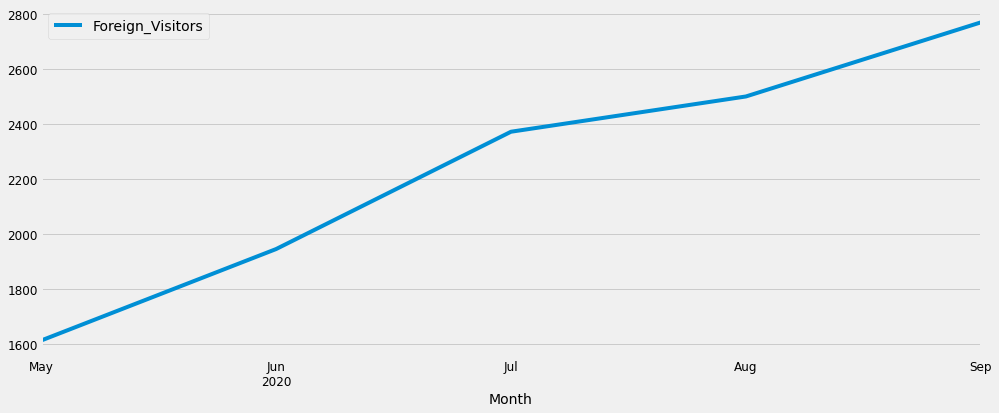

In [107]:
y.plot(figsize=(15, 6))
plt.show()

#### Density of observation plot:

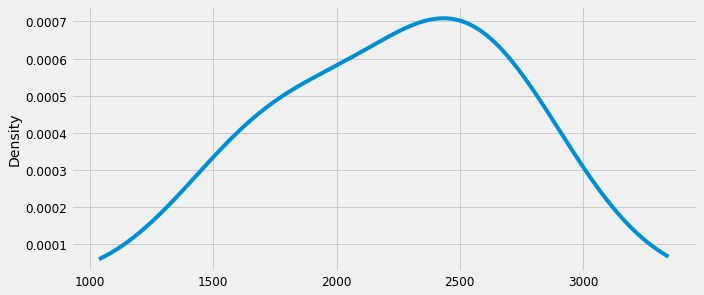

In [108]:
from pandas import Series
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(212)
y.Foreign_Visitors.plot(kind='kde')
pyplot.show()

#### Box plot showing increase in median values:

<AxesSubplot:xlabel='Month', ylabel='Foreign_Visitors'>

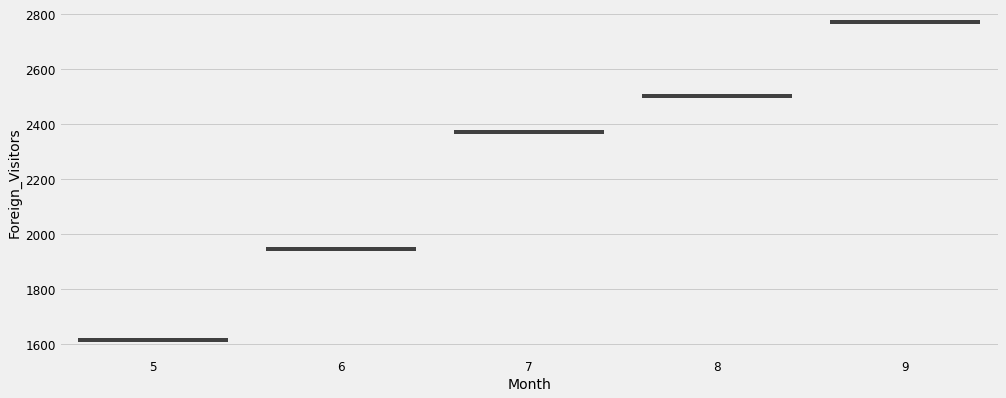

In [109]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(y.Foreign_Visitors.index.month, y.Foreign_Visitors, ax=ax)

### Checking for stationarity:

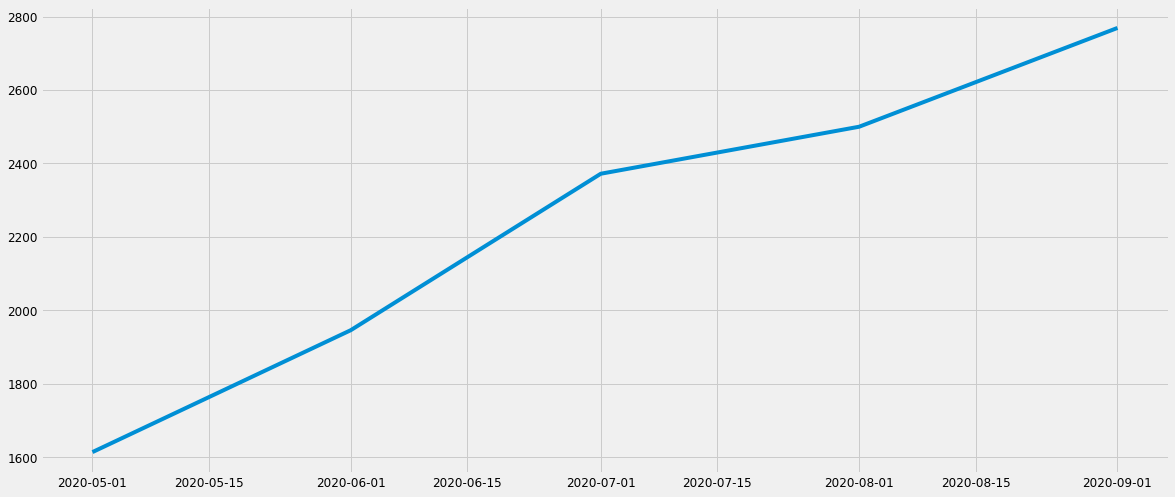

In [110]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 18, 8
plt.plot(y)

#### Plotting Rolling Statistics

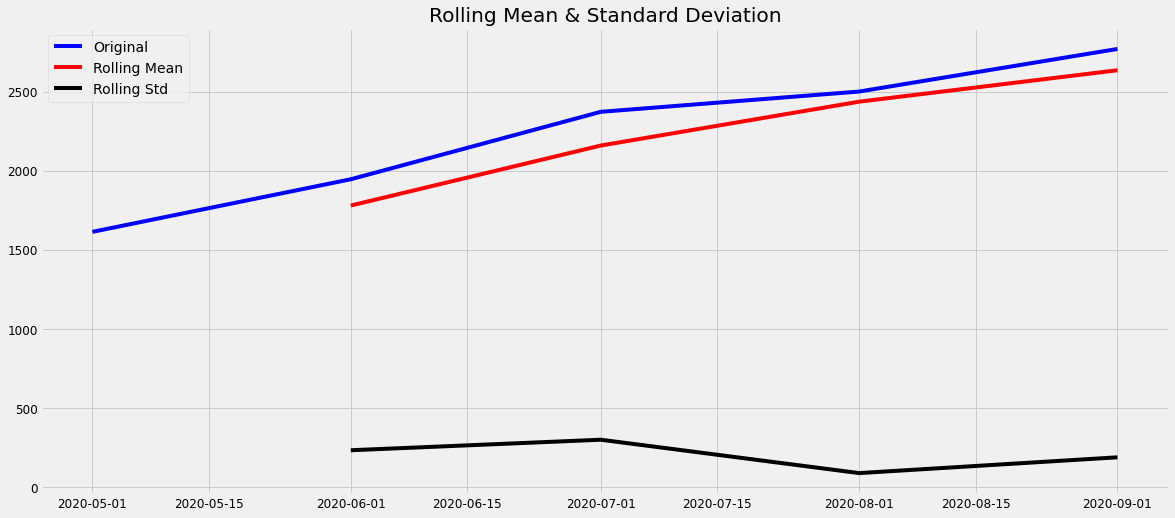

In [111]:
#Determing rolling statistics
rolmean = y.rolling(window=2).mean()
rolstd = y.rolling(window=2).std()

#Plot rolling statistics:
orig = plt.plot(y, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#### Dickey Fuller Test

In [112]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(y.Foreign_Visitors, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -1.106124
p-value                        0.712624
#Lags Used                     0.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


#### Function for testing stationarity

In [113]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=2).mean()
    rolstd = timeseries.rolling(window=2).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

### Making Time Series Stationary

##### Log Scale Transformation

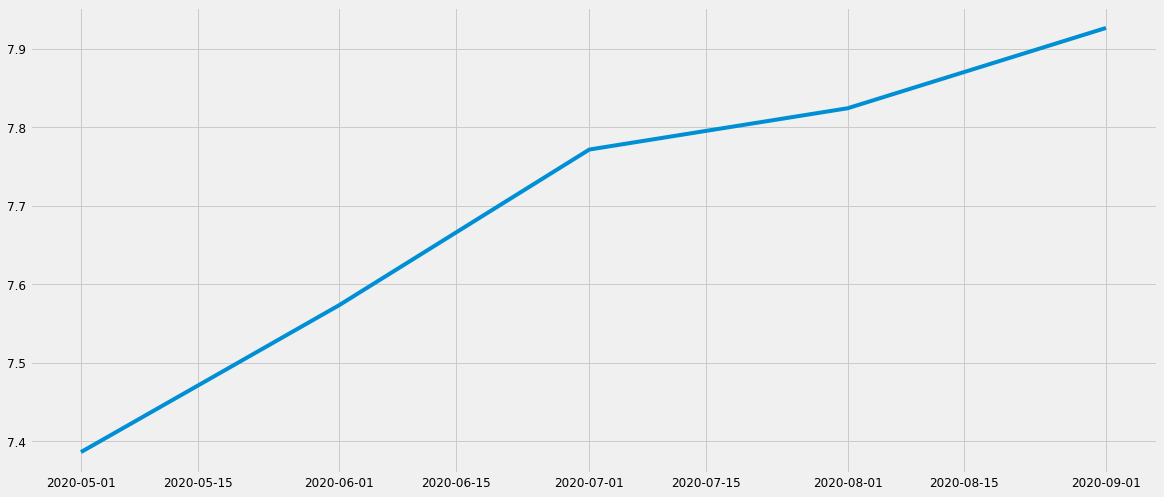

In [114]:
ts_log = np.log(y.astype(float))
plt.plot(ts_log)

### Smoothing

#### Moving Average

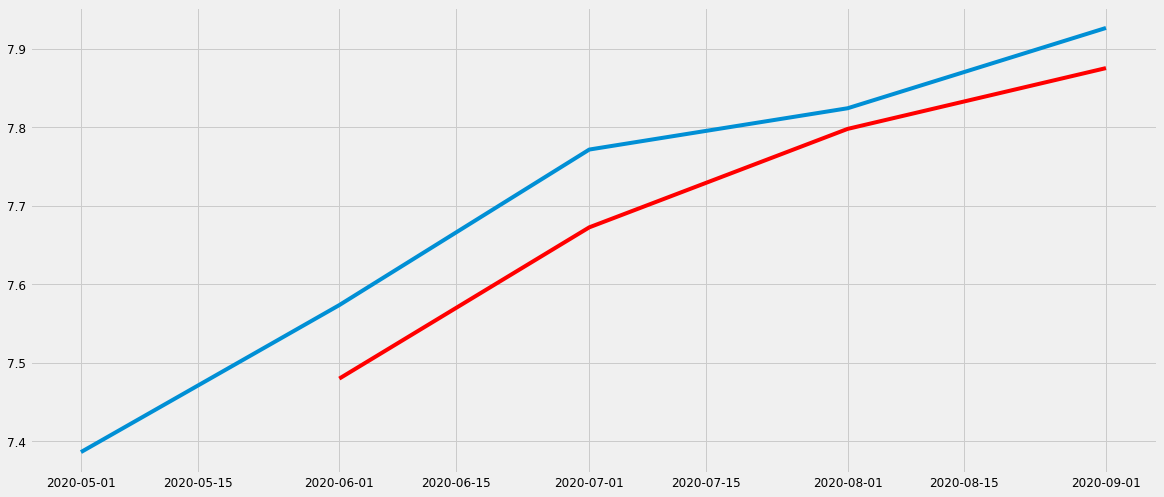

In [115]:
moving_avg = ts_log.rolling(window=2).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [116]:
ts_log_moving_avg_diff = ts_log.Foreign_Visitors - moving_avg.Foreign_Visitors
ts_log_moving_avg_diff.head()

Month
2020-05-01         NaN
2020-06-01    0.093530
2020-07-01    0.098979
2020-08-01    0.026279
2020-09-01    0.051098
Name: Foreign_Visitors, dtype: float64

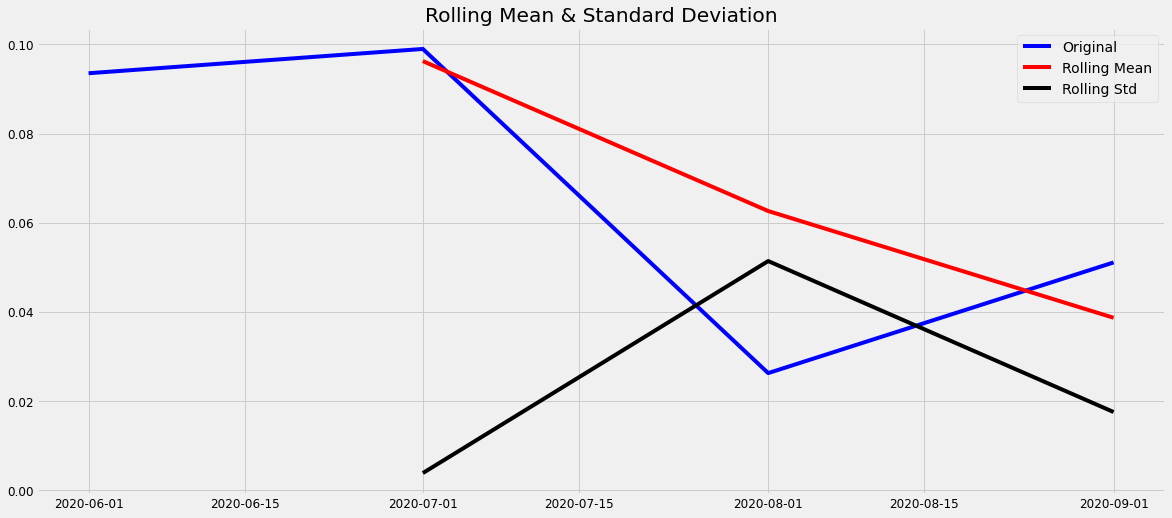

Results of Dickey-Fuller Test:
Test Statistic                 -0.988561
p-value                         0.757414
#Lags Used                      0.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


In [117]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

#### Exponentially weighted moving average:

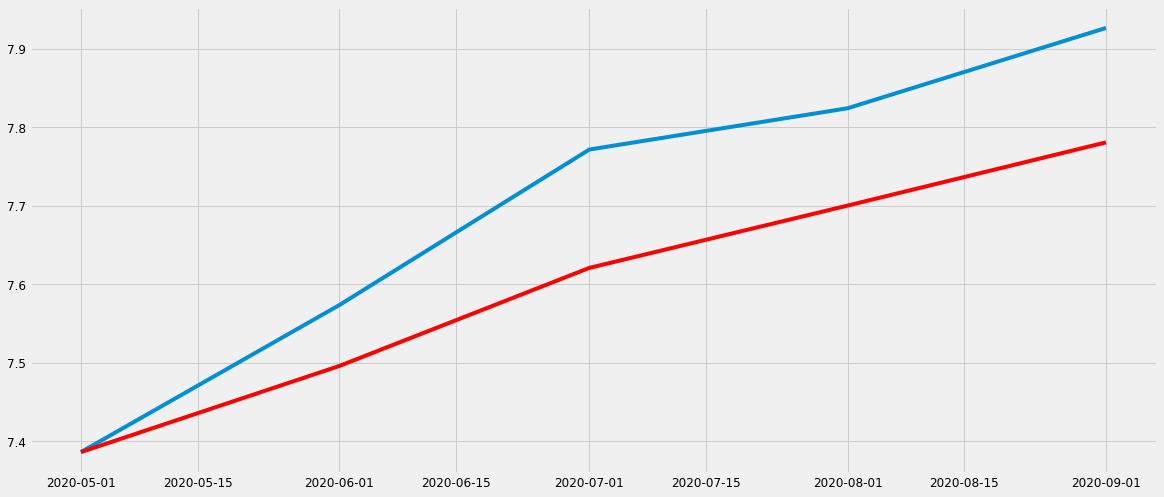

In [118]:
expwighted_avg = ts_log.ewm(halflife=2).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

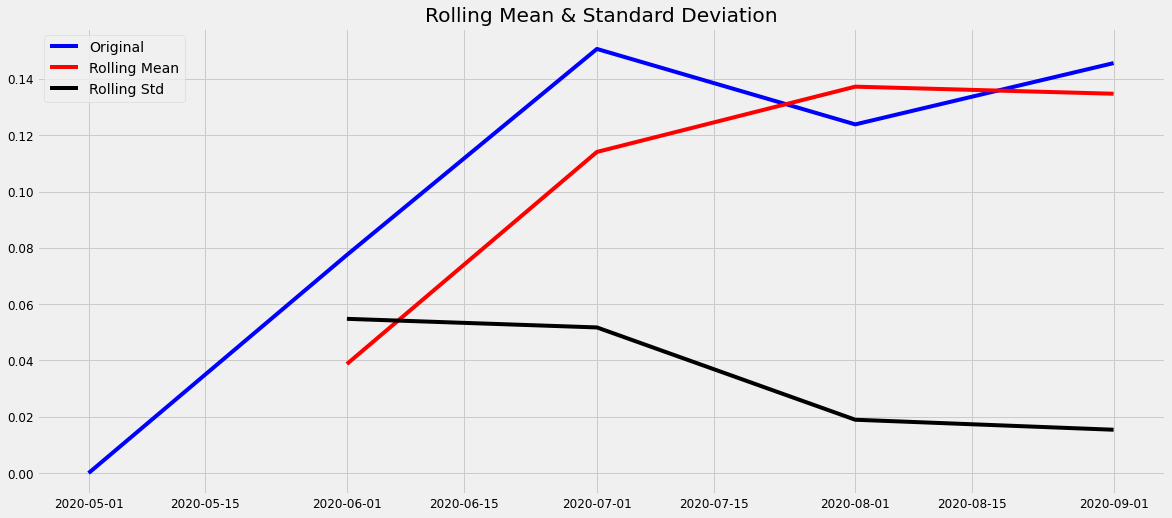

Results of Dickey-Fuller Test:
Test Statistic                -2.519978
p-value                        0.110689
#Lags Used                     0.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


In [119]:
ts_log_ewma_diff = ts_log.Foreign_Visitors - expwighted_avg.Foreign_Visitors
test_stationarity(ts_log_ewma_diff)

#### Differencing

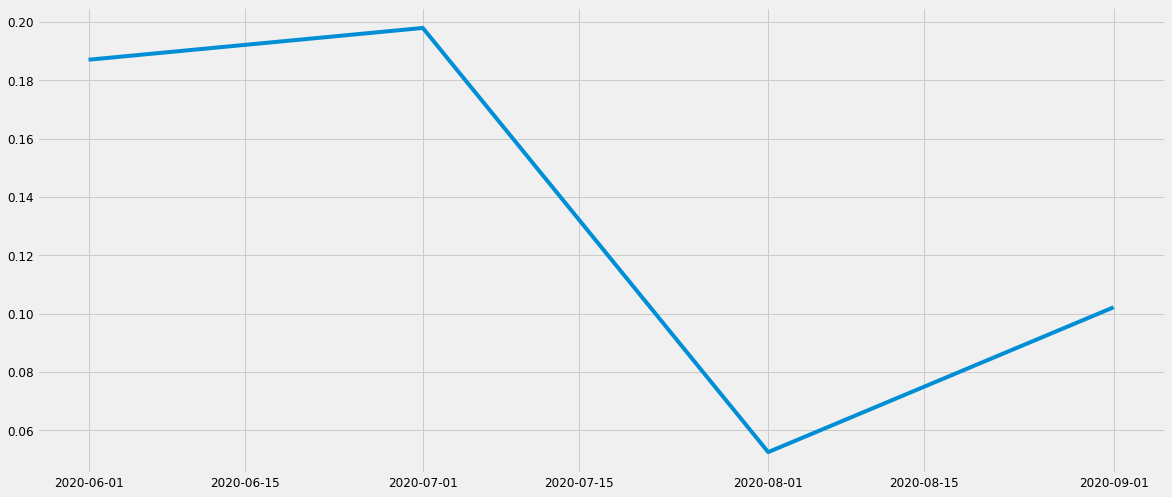

In [120]:
ts_log_diff = ts_log.Foreign_Visitors - ts_log.Foreign_Visitors.shift()
plt.plot(ts_log_diff)

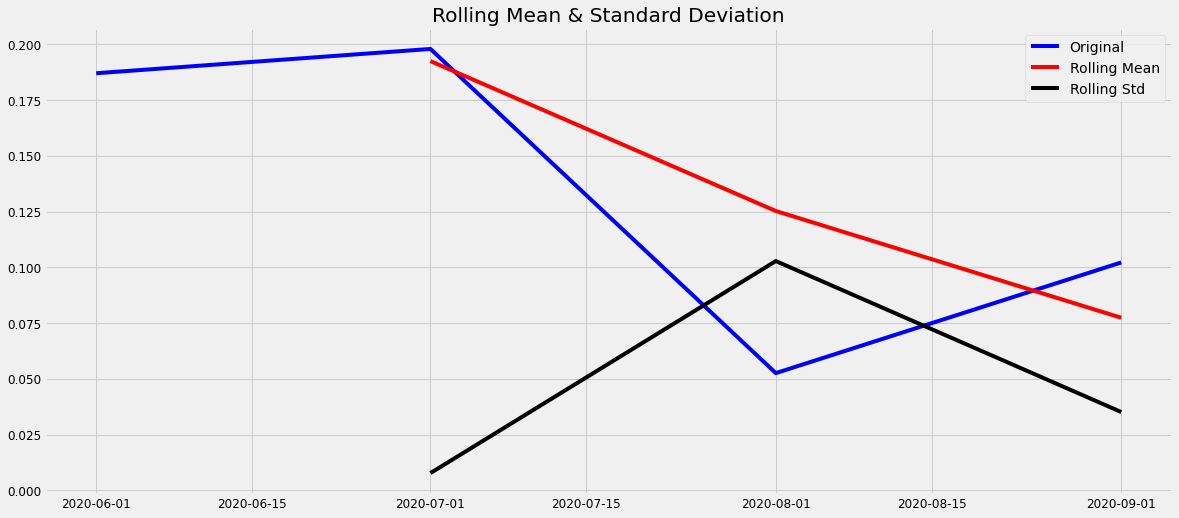

Results of Dickey-Fuller Test:
Test Statistic                 -0.988561
p-value                         0.757414
#Lags Used                      0.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


In [121]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

### Time Series Forecasting

In [122]:
from statsmodels.tsa.stattools import acf, pacf

In [123]:
lag_acf = acf(ts_log_diff, nlags=1)
lag_pacf = pacf(ts_log_diff, nlags=1, method='ols')

#### Autocorrelation Plot

Text(0.5, 1.0, 'Autocorrelation Function')

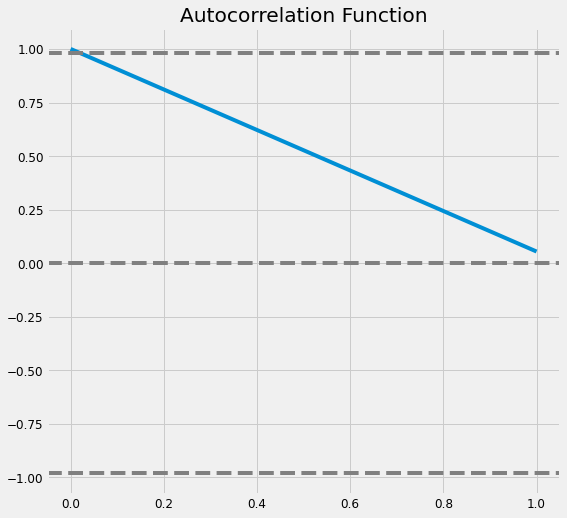

In [124]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#### Partial autocorrelation Plot

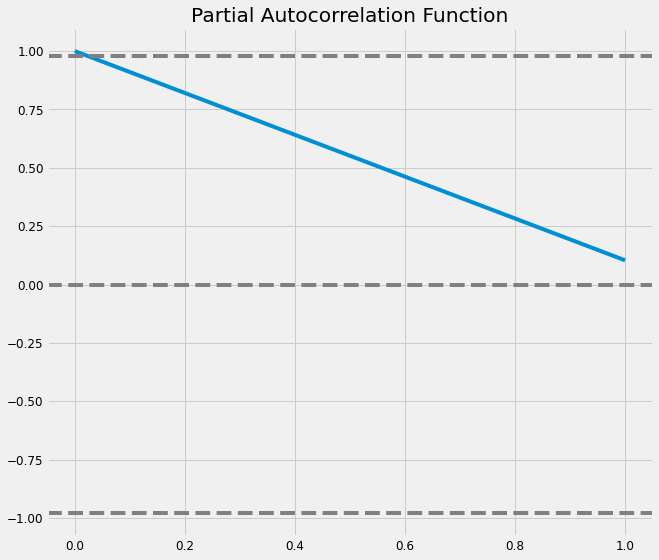

In [125]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

#### Combined Model(Auto Regression + Moving Average)

In [126]:
from statsmodels.tsa.arima_model import ARIMA

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 0.0145')

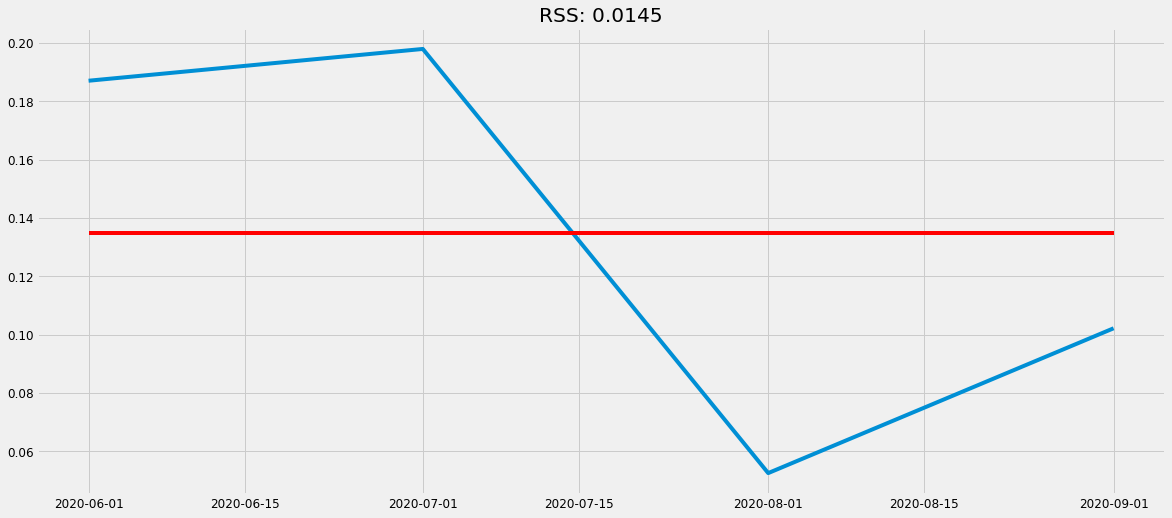

In [127]:
model = ARIMA(ts_log, order=(0, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

### Taking back to Original Scale

In [128]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Month
2020-06-01    0.134943
2020-07-01    0.134943
2020-08-01    0.134943
2020-09-01    0.134943
dtype: float64


In [129]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Month
2020-06-01    0.134943
2020-07-01    0.269885
2020-08-01    0.404828
2020-09-01    0.539771
dtype: float64


In [130]:
predictions_ARIMA_log = pd.Series(ts_log.Foreign_Visitors.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
print(predictions_ARIMA_log.head())

Month
2020-05-01    7.386471
2020-06-01    7.521414
2020-07-01    7.656356
2020-08-01    7.791299
2020-09-01    7.926242
dtype: float64


Text(0.5, 1.0, 'RMSE: 128.6828')

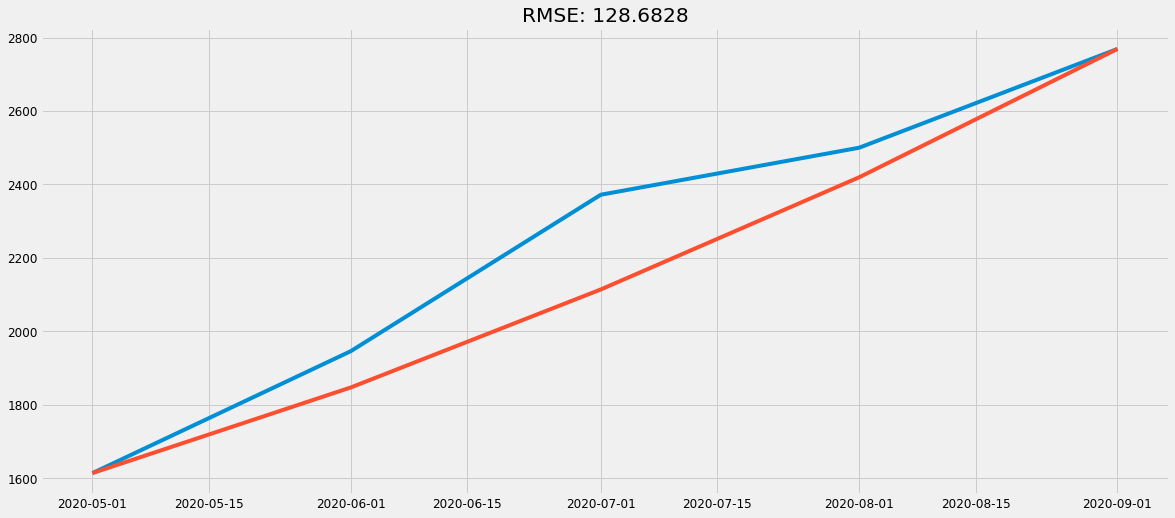

In [131]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(y.Foreign_Visitors)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-y.Foreign_Visitors)**2)/len(y.Foreign_Visitors)))

#### R-2 score of our Time Series Model:

In [132]:
print('R-2 score: ',metrics.r2_score(y.Foreign_Visitors, predictions_ARIMA))

R-2 score:  0.9018042823292753


In [133]:
predicted_ARIMA = pd.DataFrame({'Actual':y.Foreign_Visitors, 'Predicted':predictions_ARIMA.astype(int)})
predicted_ARIMA.head()

,Actual,Predicted
Month,,
2020-05-01,1614,1614
2020-06-01,1946,1847
2020-07-01,2372,2114
2020-08-01,2500,2419
2020-09-01,2769,2768


In [134]:
predicted_ARIMA['Predicted'] = results_ARIMA.predict(start = '2020-06-01', end = '2020-09-01', dynamic= True)
predicted_ARIMA.head(10)

,Actual,Predicted
Month,,
2020-05-01,1614,NaN
2020-06-01,1946,0.134943
2020-07-01,2372,0.134943
2020-08-01,2500,0.134943
2020-09-01,2769,0.134943


#### Prediction for 1st October for the first city:

In [135]:
last_date = results_ARIMA.fittedvalues.iloc[[-1]].index
last_date = last_date + pd.Timedelta(days=30)
results_ARIMA.fittedvalues=results_ARIMA.fittedvalues.append(pd.Series(index=[last_date]))
results_ARIMA.fittedvalues=results_ARIMA.fittedvalues.fillna(results_ARIMA.fittedvalues[-2])

In [136]:
print(results_ARIMA.fittedvalues)

2020-06-01 00:00:00       0.134943
2020-07-01 00:00:00       0.134943
2020-08-01 00:00:00       0.134943
2020-09-01 00:00:00       0.134943
(2020-10-01 00:00:00,)    0.134943
dtype: float64


In [137]:
predictions_ARIMA_diff_2 = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff_2.head())

2020-06-01 00:00:00       0.134943
2020-07-01 00:00:00       0.134943
2020-08-01 00:00:00       0.134943
2020-09-01 00:00:00       0.134943
(2020-10-01 00:00:00,)    0.134943
dtype: float64


In [138]:
predictions_ARIMA_diff_cumsum_2 = predictions_ARIMA_diff_2.cumsum()
print (predictions_ARIMA_diff_cumsum_2.head())

2020-06-01 00:00:00       0.134943
2020-07-01 00:00:00       0.269885
2020-08-01 00:00:00       0.404828
2020-09-01 00:00:00       0.539771
(2020-10-01 00:00:00,)    0.674713
dtype: float64


In [139]:
predictions_ARIMA_log_2 = pd.Series(ts_log.Foreign_Visitors.iloc[0], index=ts_log.index)
predictions_ARIMA_log_2 = predictions_ARIMA_log_2.add(predictions_ARIMA_diff_cumsum_2,fill_value=0)
predictions_ARIMA_log_2[-1]=predictions_ARIMA_log_2[0]+predictions_ARIMA_log_2[-1]
print(predictions_ARIMA_log_2.head(10))

2020-05-01 00:00:00       7.386471
2020-06-01 00:00:00       7.521414
2020-07-01 00:00:00       7.656356
2020-08-01 00:00:00       7.791299
2020-09-01 00:00:00       7.926242
(2020-10-01 00:00:00,)    8.061184
dtype: float64


In [140]:
predictions_ARIMA_2 = np.exp(predictions_ARIMA_log_2)

#### Prediction Table for first City:

In [141]:
print(predictions_ARIMA_2.astype(int))

2020-05-01 00:00:00       1614
2020-06-01 00:00:00       1847
2020-07-01 00:00:00       2114
2020-08-01 00:00:00       2419
2020-09-01 00:00:00       2768
(2020-10-01 00:00:00,)    3169
dtype: int32


In [142]:
predictions_ARIMA_2[-1].astype(int)

3169

#### Function for ARIMA Model for predicting for rest of the cities:

In [143]:
September=[]
def ARIMA_Model(x):
    df = pd.DataFrame({'Month':['2020-05-01','2020-06-01','2020-07-01','2020-08-01','2020-09-01'],'Foreign_Visitors':dataset2.iloc[x][1:]})
    df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
    y = df.set_index('Month')
    ts_log = np.log(y.astype(float))
    model = ARIMA(ts_log, order=(0, 1, 0)) 
    results_ARIMA = model.fit(disp=-1)
    last_date = results_ARIMA.fittedvalues.iloc[[-1]].index
    last_date = last_date + pd.Timedelta(days=30)
    results_ARIMA.fittedvalues=results_ARIMA.fittedvalues.append(pd.Series(index=[last_date]))
    results_ARIMA.fittedvalues=results_ARIMA.fittedvalues.fillna(results_ARIMA.fittedvalues[-2])
    predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
    predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
    predictions_ARIMA_log = pd.Series(ts_log.Foreign_Visitors.iloc[0], index=ts_log.index)
    predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
    predictions_ARIMA_log[-1]=predictions_ARIMA_log[0]+predictions_ARIMA_log[-1]
    predictions_ARIMA = np.exp(predictions_ARIMA_log)
    a=predictions_ARIMA[-1].astype(int)
    September.append(a)

In [144]:
for i in range(501):
    ARIMA_Model(i)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\hp\

In [145]:
print(September)

[3169, 729357, 277721, 5052129, 3556907, 729357, 7467395, 87811, 664513, 1690540, 1706799, 5052129, 6533, 192259, 5052129, 729357, 729357, 482833, 482833, 272550, 664513, 1690540, 67108, 5052129, 1690540, 729357, 5368155, 3556907, 3169, 243365, 664513, 1900460, 1690540, 5052129, 5052129, 277721, 3556907, 1690540, 482833, 1690540, 5368155, 5052129, 465351, 326543, 121324, 482833, 1058497, 1058497, 482833, 5052129, 192259, 192259, 1120079, 76737, 326543, 272550, 3556907, 1058497, 144467, 5368155, 1690540, 5052129, 347336, 1058497, 1120079, 3556907, 192259, 5052129, 3556907, 482833, 482833, 3556907, 3556907, 144467, 347336, 39971, 1690540, 5368155, 1690540, 194152, 7467395, 1058497, 664513, 664513, 8055776, 243365, 243365, 87811, 4815784, 2113, 396805, 1136027, 396805, 396805, 3556907, 5368155, 326543, 5368155, 3556907, 192259, 1690540, 5368155, 5052129, 3556907, 729357, 5052129, 7322, 729357, 729357, 1690540, 5368155, 1058497, 28322, 5368155, 76737, 5052129, 3169, 1706799, 1690540, 16905

In [146]:
len(September)

501

#### Inserting the Foreign Visitors(September) column to our test dataset:

In [147]:
test_data.insert(40, "Foreign_Visitors(September)", September, True) 

In [148]:
test_data.head(10)

,City,State,Population [2011],Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,...,N.T,T,T.C,T.M.C,T.P,U.A,HIGH,LOW,MEDIUM,Foreign_Visitors(September)
787,Tuensang,Nagaland,-0.222495,0.776536,-1.502875,-2.562199,0.247647,-1.371900,-0.907776,-0.206121,...,0,0,1,0,0,0,0,0,1,3169
788,Lakshmeshwar,Karnataka,-0.222524,0.856154,-0.550265,0.981138,-0.855933,0.341652,-1.131887,-0.205971,...,0,0,0,1,0,0,1,0,0,729357
789,Zira,Punjab,-0.222556,-0.497340,1.354954,0.601495,-0.821446,-1.707161,1.429630,-0.209096,...,0,0,0,0,0,0,1,0,0,277721
790,Yawal,Maharashtra,-0.222594,-0.391184,-0.073960,0.095304,-0.924907,0.863168,-0.338804,-0.208892,...,0,0,0,0,0,0,1,0,0,5052129
791,Thana Bhawan,Uttar Pradesh,-0.222648,-0.656575,0.878649,1.107686,0.178673,0.080894,-0.645976,-0.209550,...,0,0,0,0,0,0,0,1,0,3556907
792,Ramdurg,Karnataka,-0.222677,1.068466,0.402344,-0.284339,0.178673,1.272930,0.265523,-0.205649,...,0,0,0,0,0,1,0,0,1,729357
793,Pulgaon,Maharashtra,-0.222862,-0.391184,-0.073960,0.095304,-0.511064,-1.595407,-0.842183,-0.209161,...,0,0,0,0,0,0,0,0,1,7467395
794,Sadasivpet,Telangana,-0.223136,0.511145,0.402344,1.234234,-0.580038,-1.297398,-0.020554,-0.207397,...,0,0,0,0,0,0,0,1,0,87811
795,Nargund,Karnataka,-0.223198,1.015388,-1.502875,0.854590,-0.338630,-0.105362,0.769036,-0.206324,...,0,0,0,1,0,0,0,1,0,664513
796,Neem-Ka-Thana,Rajasthan,-0.223286,-1.373130,-0.550265,-0.663983,-0.890420,-0.105362,0.340829,-0.211799,...,0,0,0,0,0,0,0,0,1,1690540


In [149]:
test_data.tail(10)

,City,State,Population [2011],Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,...,N.T,T,T.C,T.M.C,T.P,U.A,HIGH,LOW,MEDIUM,Foreign_Visitors(September)
1278,Bhaiseena,Rajasthan,-0.271398,-0.868887,-1.026570,0.474947,-2.407842,0.602410,-1.498796,-0.258022,...,0,0,0,0,0,0,0,1,0,1690540
1279,Dwarahat,Uttarakhand,-0.272055,-1.744677,-0.550265,-2.309104,-2.373355,-0.179864,-1.153312,-0.258819,...,0,0,0,0,0,0,1,0,0,121324
1280,Badrinath,Uttarakhand,-0.272508,-1.426208,1.354954,-2.309104,-2.338869,1.459186,-0.246144,-0.259200,...,0,0,0,0,0,0,0,1,0,121324
1281,Dogadda,Uttarakhand,-0.272531,-1.638521,-0.073960,-2.435651,-2.614764,-0.179864,-1.729175,-0.259254,...,0,0,0,0,0,0,1,0,0,121324
1282,Devprayag,Uttarakhand,-0.272925,-1.638521,1.354954,-2.941843,-2.511303,-0.999389,0.012021,-0.259627,...,0,0,0,0,0,0,0,0,1,121324
1283,Nandaprayag,Uttarakhand,-0.273669,-1.426208,0.402344,-2.941843,-2.580277,1.123926,-0.673716,-0.260314,...,0,0,0,0,0,0,0,0,1,121324
1284,Kirtinagar,Uttarakhand,-0.273850,-1.320052,0.878649,-2.309104,-2.442329,1.757195,-0.600309,-0.260479,...,0,0,0,0,0,0,1,0,0,121324
1285,Kedarnath,Uttarakhand,-0.275168,-1.293513,-1.026570,-2.688747,-2.338869,1.421935,0.823155,-0.261749,...,0,0,0,0,0,0,0,1,0,121324
1286,Gangotri,Uttarakhand,-0.275899,-1.320052,0.402344,-2.815295,-2.373355,0.714163,-0.290093,-0.262455,...,0,0,0,0,0,0,0,0,1,121324
1287,Kumarganj,Uttar Pradesh,-0.207029,-1.028122,-1.026570,0.601495,-2.338869,-0.068111,-1.272538,-0.262610,...,0,0,0,0,0,0,1,0,0,3556907


#### Standardizing the Foreign Visitors column

In [150]:
test_data['Foreign_Visitors(September)'] = (test_data['Foreign_Visitors(September)'] - test_data['Foreign_Visitors(September)'].mean()) / test_data['Foreign_Visitors(September)'].std()

In [151]:
test_data.head()

,City,State,Population [2011],Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,...,N.T,T,T.C,T.M.C,T.P,U.A,HIGH,LOW,MEDIUM,Foreign_Visitors(September)
787,Tuensang,Nagaland,-0.222495,0.776536,-1.502875,-2.562199,0.247647,-1.371900,-0.907776,-0.206121,...,0,0,1,0,0,0,0,0,1,-0.948118
788,Lakshmeshwar,Karnataka,-0.222524,0.856154,-0.550265,0.981138,-0.855933,0.341652,-1.131887,-0.205971,...,0,0,0,1,0,0,1,0,0,-0.596237
789,Zira,Punjab,-0.222556,-0.497340,1.354954,0.601495,-0.821446,-1.707161,1.429630,-0.209096,...,0,0,0,0,0,0,1,0,0,-0.815082
790,Yawal,Maharashtra,-0.222594,-0.391184,-0.073960,0.095304,-0.924907,0.863168,-0.338804,-0.208892,...,0,0,0,0,0,0,1,0,0,1.498405
791,Thana Bhawan,Uttar Pradesh,-0.222648,-0.656575,0.878649,1.107686,0.178673,0.080894,-0.645976,-0.209550,...,0,0,0,0,0,0,0,1,0,0.773880


### Using The KNN Model for prediction as it was giving the best R-2 score

In [152]:
X = train_data[['Population [2011]','Median Age','Avg Temp','Toilets Avl','Water Purity','H Index','# of hospitals','Foreign Visitors','HIGH','LOW','MEDIUM']]
Y = train_data['Covid Cases']

TRAINING:

In [153]:
kr.fit(X,Y)

KNeighborsRegressor()

In [154]:
X_TEST = test_data[['Population [2011]','Median Age','Avg Temp','Toilets Avl','Water Purity','H Index','# of hospitals','Foreign_Visitors(September)','HIGH','LOW','MEDIUM']]

#### Prediction Table:

In [155]:
Y_prediction = kr.predict(X_TEST)

In [156]:
Predicted_df = pd.DataFrame({'City':test_data['City'], 'Predicted_covid-19 cases(1st October)':Y_prediction.astype(int)})
Predicted_df.head(10)

,City,Predicted_covid-19 cases(1st October)
787,Tuensang,3365
788,Lakshmeshwar,2379
789,Zira,2625
790,Yawal,2312
791,Thana Bhawan,2480
792,Ramdurg,2424
793,Pulgaon,3169
794,Sadasivpet,2397
795,Nargund,2032
796,Neem-Ka-Thana,1765


In [157]:
Predicted_df.tail(10)

,City,Predicted_covid-19 cases(1st October)
1278,Bhaiseena,2137
1279,Dwarahat,2263
1280,Badrinath,2601
1281,Dogadda,2438
1282,Devprayag,2730
1283,Nandaprayag,2486
1284,Kirtinagar,2539
1285,Kedarnath,2287
1286,Gangotri,2539
1287,Kumarganj,2180


In [158]:
Predicted_df.to_csv('result_file-2.csv', index=False)